In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

The dataset "conjunto_de_datos_iter_00CSV20.csv" must be downloaded from: https://inegi.org.mx/programas/ccpv/2020/#Datos_abiertos, in the section 'Principales resultados por localidad (ITER)' and subsection 'Estados Unidos Mexicanos' it will be accessible. After downloading the dataset it must be relocated to the data folder.

In [2]:
df = pd.read_csv('../data/conjunto_de_datos_iter_00CSV20.csv')

C:\Users\TheAl\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


By using this query only the totals of each variable for each municipality is used well the rest of the dataframe is ignored.

In [3]:
df.query("NOM_LOC == 'Total del Municipio'", inplace = True)

In [4]:
df

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
6,1,Aguascalientes,1,Aguascalientes,0,Total del Municipio,NaN,NaN,NaN,948990,...,251719,178619,130290,80951,56131,3299,7293,74227,731,*
574,1,Aguascalientes,2,Asientos,0,Total del Municipio,NaN,NaN,NaN,51536,...,10682,4526,3882,596,556,377,1447,7206,177,*
749,1,Aguascalientes,3,Calvillo,0,Total del Municipio,NaN,NaN,NaN,58250,...,13666,6553,4749,1382,1352,443,904,8061,138,*
918,1,Aguascalientes,4,Cosío,0,Total del Municipio,NaN,NaN,NaN,17000,...,3424,1741,1664,223,191,139,414,1912,50,*
985,1,Aguascalientes,5,Jesús María,0,Total del Municipio,NaN,NaN,NaN,129929,...,31408,19920,13483,9296,6582,480,1150,11447,148,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195372,32,Zacatecas,54,Villa Hidalgo,0,Total del Municipio,NaN,NaN,NaN,19446,...,3929,1150,1090,109,106,160,744,3569,80,*
195422,32,Zacatecas,55,Villanueva,0,Total del Municipio,NaN,NaN,NaN,31558,...,7418,4411,5181,643,569,306,746,4252,101,*
195542,32,Zacatecas,56,Zacatecas,0,Total del Municipio,NaN,NaN,NaN,149607,...,39755,31989,28630,11944,7639,681,1185,8783,129,*
195616,32,Zacatecas,57,Trancoso,0,Total del Municipio,NaN,NaN,NaN,20455,...,3834,1092,1854,204,185,130,677,3274,59,*


By using the dictonary that the dataset offers, the selection of columns of interest is done.

In [5]:
df=df[['ENTIDAD','NOM_ENT','MUN','NOM_MUN','PCON_DISC','PCON_LIMI','PCLIM_PMEN','GRAPROES','PSINDER','PDER_SS','PROM_OCUP']].copy()

Based on the dictonary the columns are renamed in a clearer way.

In [6]:
df.rename(columns = {'MUN':'municipalitie_number', 'NOM_MUN': 'municipalities','PCON_DISC': 'population_disability','PCON_LIMI': 'population_limitation','PCLIM_PMEN': 'population_mental_problem','GRAPROES': 'average_years_finish', 'PSINDER': 'no_med_afilation', 'PDER_SS': 'med_afilation', 'PROM_OCUP': 'average_household_size'}, inplace=True)

To properly merge the dataframe from the week 1 analyzes with the dataframe that is currently being analyze it is necessary to obtain the code that describes the state of origin of the municipality.

In [7]:
df['mun_num'] = df['municipalitie_number'].apply(lambda i: f'{i:03d}')
df['ENTIDAD'] = df['ENTIDAD'].astype(str)
df['cve_ent'] = df['ENTIDAD'] + df['mun_num']

It is also necessary to change the data types of the columns of interest to int and float data types, since this values will be normalized for futher study.

In [8]:
df['population_disability'] = df['population_disability'].astype(int)
df['population_limitation'] = df['population_limitation'].astype(int)
df['population_mental_problem'] = df['population_mental_problem'].astype(int)
df['average_years_finish'] = df['average_years_finish'].astype(float)
df['no_med_afilation'] = df['no_med_afilation'].astype(int)
df['med_afilation'] = df['med_afilation'].astype(int)
df['average_household_size'] = df['average_household_size'].astype(float)

The week 1 analyzes it is read, so that future correlation between the previous dataframe and it can be observed.

In [9]:
dfWeek1 = pd.read_csv('../data/week1analyzesMunicipalities.csv')
dfWeek1['cve_ent'] = dfWeek1['cve_ent'].astype('str')
dfWeek1

,cve_ent,municipalitie,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days
0,31001,Abala,7035,57,810.234542,28.429282,10,142.146411,0.000000
1,11001,Abasolo,95581,693,725.039495,4.184932,92,96.253439,1.046233
2,19001,Abasolo,2918,28,959.561343,0.000000,3,102.810144,0.000000
3,28001,Abasolo,12768,46,360.275689,62.656642,4,31.328321,0.000000
4,5001,Abasolo,1130,7,619.469027,0.000000,1,88.495575,0.000000
...,...,...,...,...,...,...,...,...,...
2452,21216,Zoquiapan,2583,2,77.429346,38.714673,0,0.000000,0.000000
2453,21217,Zoquitlan,19699,6,30.458399,5.076400,3,15.229199,0.000000
2454,30203,Zozocolco de Hidalgo,15708,10,63.661828,6.366183,2,12.732366,0.000000
2455,15119,Zumpahuacan,17962,88,489.923171,5.567309,16,89.076940,5.567309


The week 1 analyzes and the lastest dataframe is merged using the code of the state of origin of the municipality.

In [10]:
dfAll = pd.merge(df,dfWeek1,on=['cve_ent'])
dfAll

,ENTIDAD,NOM_ENT,municipalitie_number,municipalities,population_disability,population_limitation,population_mental_problem,average_years_finish,no_med_afilation,med_afilation,...,mun_num,cve_ent,municipalitie,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days
0,1,Aguascalientes,1,Aguascalientes,47525,116705,13945,10.84,173199,774363,...,001,1001,Aguascalientes,961977,22076,2294.857361,70.687761,2143,222.770399,7.484586
1,1,Aguascalientes,2,Asientos,2886,4551,692,8.54,7590,43922,...,002,1002,Asientos,50864,464,912.236552,29.490406,36,70.776974,1.966027
2,1,Aguascalientes,3,Calvillo,4088,6760,1191,8.05,11832,46370,...,003,1003,Calvillo,60760,982,1616.194865,8.229098,26,42.791310,0.000000
3,1,Aguascalientes,4,Cosío,805,1933,206,9.08,2347,14651,...,004,1004,Cosio,16918,130,768.412342,29.554321,12,70.930370,0.000000
4,1,Aguascalientes,5,Jesús María,5036,11904,1642,10.22,27299,102428,...,005,1005,Jesus Maria,130184,779,598.383826,16.131015,62,47.624900,0.768144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,32,Zacatecas,54,Villa Hidalgo,1404,2233,201,8.02,3009,16421,...,054,32054,Villa Hidalgo,20177,97,480.745403,9.912276,21,104.078902,4.956138
2453,32,Zacatecas,55,Villanueva,2129,3954,420,8.08,7941,23598,...,055,32055,Villanueva,31804,425,1336.309898,37.731103,52,163.501446,3.144259
2454,32,Zacatecas,56,Zacatecas,8455,20144,1830,11.57,25350,123979,...,056,32056,Zacatecas,155533,7623,4901.210676,214.745424,557,358.123356,7.072454
2455,32,Zacatecas,57,Trancoso,1020,1958,268,8.61,2831,17549,...,057,32057,Trancoso,20285,241,1188.070002,59.157013,34,167.611536,4.929751


Once merged the dataframes only the data that is possible to normalized is selected. After selecting the data the normalization of it is implemented based on the total population of each municipality by obtain the percentage of people with the certain variable of interest.

In [11]:
dfAll = dfAll[['population','population_disability', 'population_limitation',
       'population_mental_problem', 'average_years_finish', 'no_med_afilation',
       'med_afilation', 'average_household_size', 'cases_rate', 
       'cases_rate_last_60_days', 'deaths_rate',
       'deaths_rate_last_60_days']].copy()
dfAll['pct_disability']=dfAll['population_disability']/dfAll['population']*100
dfAll['pct_limitation']=dfAll['population_limitation']/dfAll['population']*100
dfAll['pct_mental_problem']=dfAll['population_mental_problem']/dfAll['population']*100
dfAll['pct_no_med_afilation']=dfAll['no_med_afilation']/dfAll['population']*100
dfAll['pct_med_afilation']=dfAll['med_afilation']/dfAll['population']*100

The data normalized is only selected to create a much simplier interpretation of the correlation.

In [12]:
dfFinal = dfAll[['cases_rate','cases_rate_last_60_days', 'deaths_rate',
        'deaths_rate_last_60_days','population','pct_disability',
        'pct_limitation','pct_mental_problem', 'average_years_finish',
        'pct_no_med_afilation','pct_med_afilation', 'average_household_size']].copy()

The correlation of the data can be observed graphically using a pairplot as following

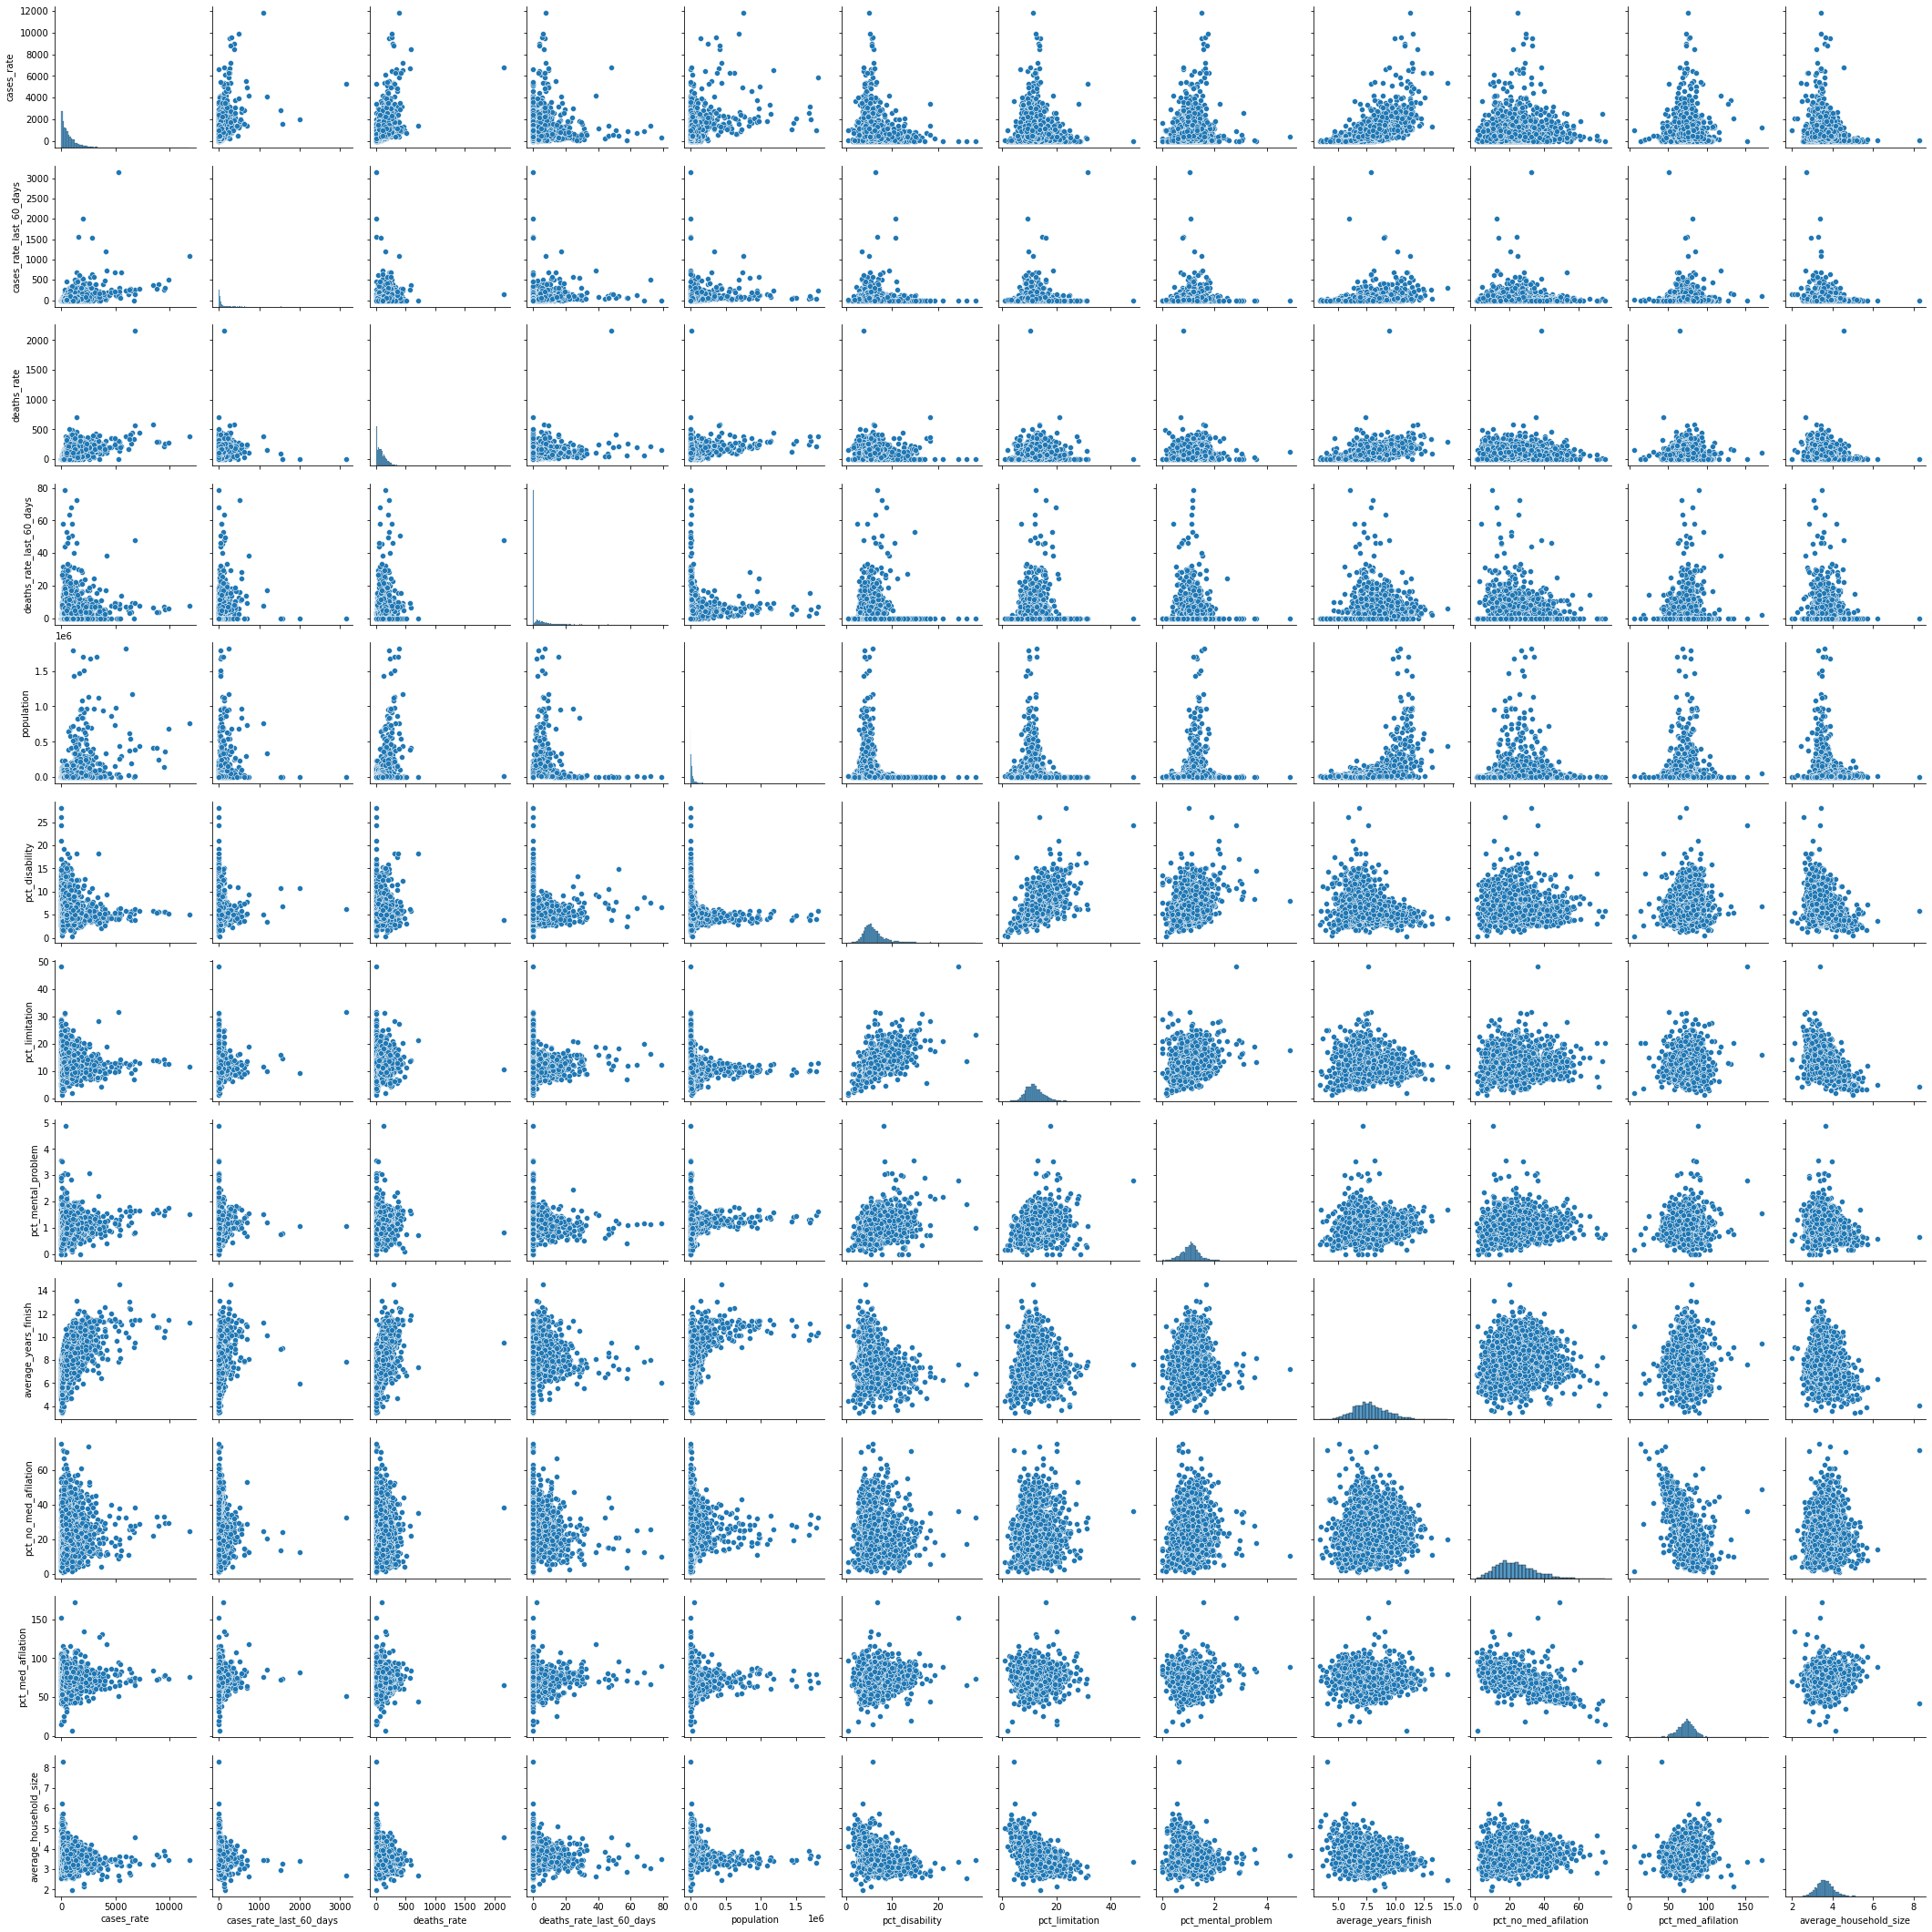

In [13]:
sns.pairplot(dfFinal)

Also the correlation is ilustrated using a diagonal correlation matrix map to simplify it as following

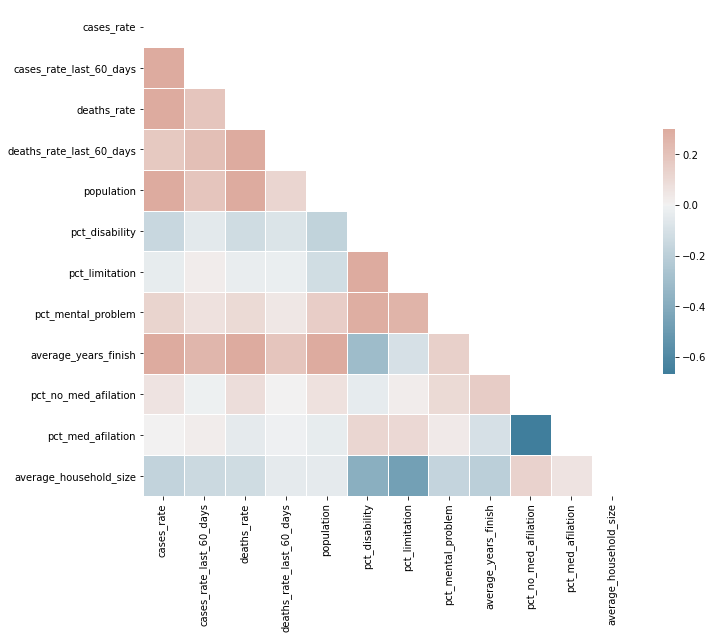

In [14]:
corr = dfFinal.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.set_context('paper', font_scale=0.5)